In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pairs=list(zip(glob.glob("./report/BS_Matrices/ETA/*"),glob.glob("./report/BS_Matrices/ERR/*")))

# Processing

In [3]:
def time_zone_cal(s):
    hour=int(s.split(':')[0])
    if 6<hour<=9:
        time_zone='Early_Morning'
    elif 9<hour<=12:
        time_zone='Morning'
    elif 12<hour<=17:
        time_zone='Afternoon'
    elif 17<hour<=23:
        time_zone='Evening'
    return time_zone

err_data={'up':{'Early_Morning':[],'Morning':[],'Afternoon':[],'Evening':[]},
          'down':{'Early_Morning':[],'Morning':[],'Afternoon':[],'Evening':[]}}
date_wise_err={'28-06-2019':[],'30-06-2019':[],'01-07-2019':[],'02-07-2019':[],
               '03-07-2019':[],'04-07-2019':[],'05-07-2019':[]}

for pair in pairs:
    eta_file,err_file=pair[0],pair[1]
    direction='up' if 'up' in err_file else 'down'
    date=eta_file.split("\\")[1].split('_')[1]
    tz=time_zone_cal(pd.read_csv(eta_file).iloc[0,2])
    df=pd.read_csv(err_file).drop(columns=['Unnamed: 0'])
    errs=[df.iloc[i,j] for i in range(0,df.shape[1]) for j in range(1,df.shape[1]) if i+1==j]
    err_data[direction][tz].append(errs)
    date_wise_err[date].extend(errs)

# TimeZone and Trail Wise Error

In [4]:
def plot_and_save(data,save_name=None,plot_kind="bar"):
    fig, ax = plt.subplots(figsize=(11,7))
    data_mean=data.mean(axis=0)
    data_std=data.std(axis=0)
    bs_names=[f'BS{i}'for i in range(2,data_mean.shape[0]+2)]
    if plot_kind=="bar":
        ax.bar(x=np.arange(len(bs_names)),height=data_mean,yerr=data_std,align='center', alpha=1, ecolor='k',
               capsize=10,color='#648FFF',error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3))
    else:
        ax.boxplot(x=data.T.tolist(),positions=np.arange(len(bs_names)),
                showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=2.0,color='black',facecolor="lightgrey"),
                whiskerprops = dict(linestyle='-',linewidth=2.0, color='black'),
                capprops=dict(linestyle='-',linewidth=2.0, color='black'),
                medianprops=dict(linestyle='-',linewidth=2.0, color='orange'))
    
    x_axis=np.arange(-1,len(bs_names)+1)
    ax.fill_between(x_axis, -1, 1,facecolor='green',alpha=0.15)
    ax.set_xlim(x_axis.min(),x_axis.max())
    ax.set_xlabel("Bus-stops",fontsize=22, fontweight='bold')
    ax.set_ylabel("Error (mins)",fontsize=22, fontweight='bold')

    ax.set_xticks(np.arange(len(bs_names)))
    ax.set_xticklabels(bs_names,fontsize=22, fontweight='bold',rotation=45)
    plt.yticks(fontsize=22, fontweight='bold')
    plt.tight_layout()
    plt.grid()
    #plt.close()
    fig.savefig("./report/plots/"+save_name)

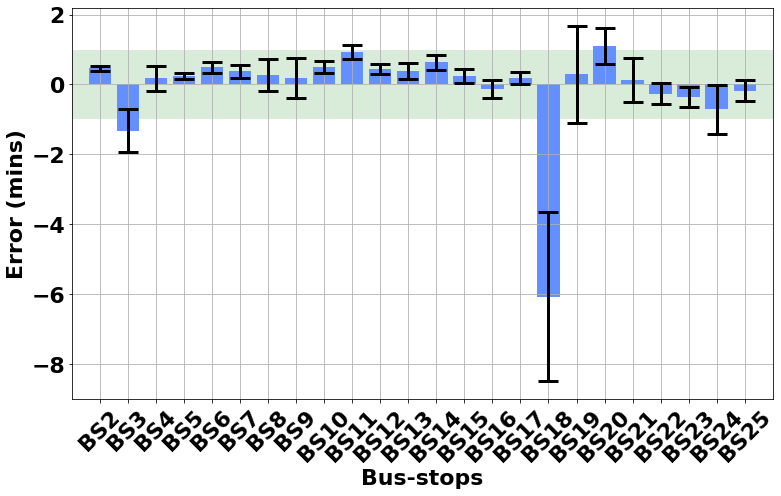

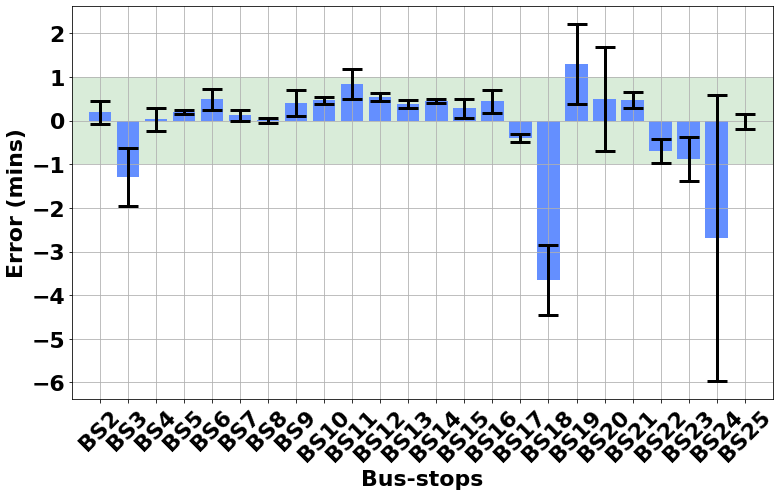

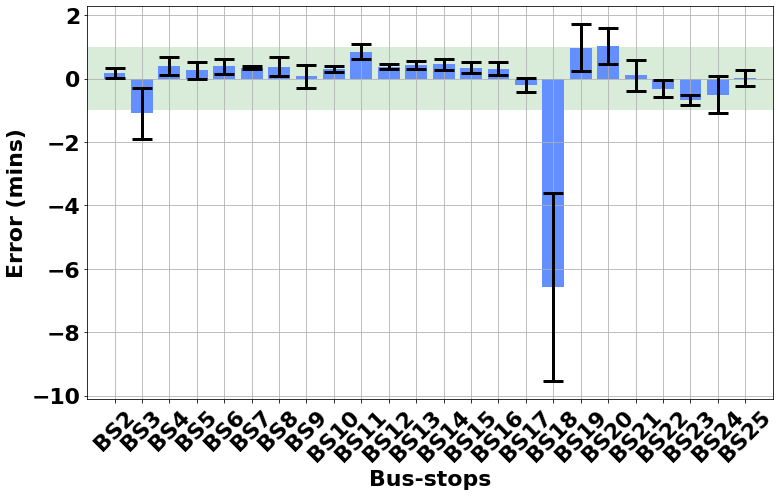

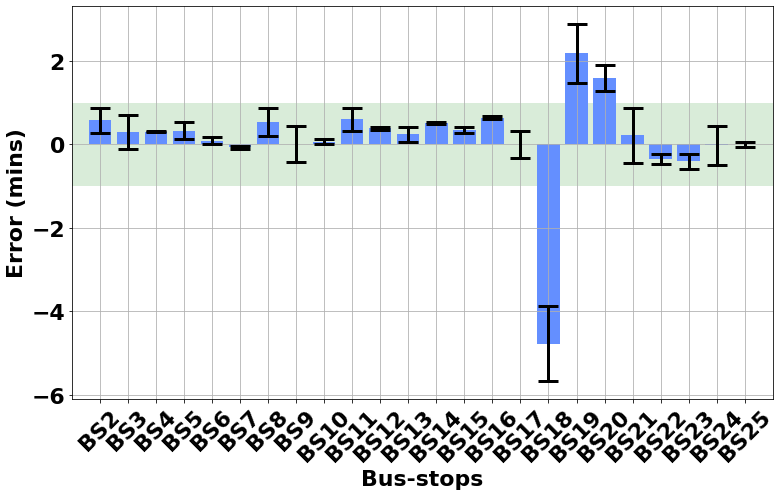

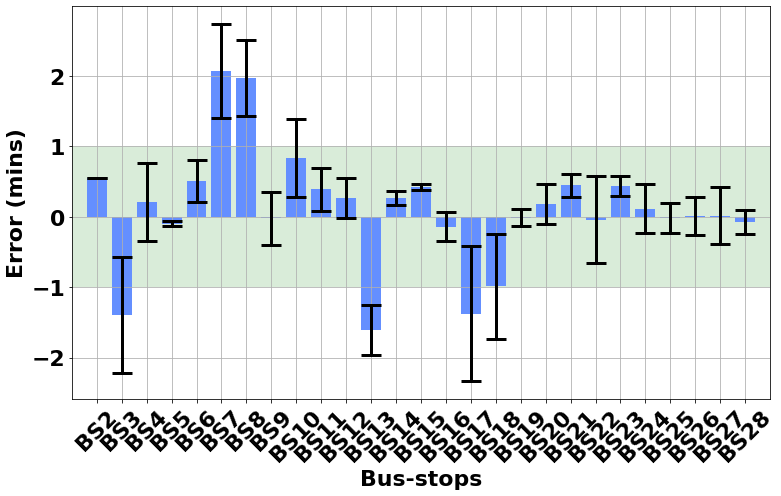

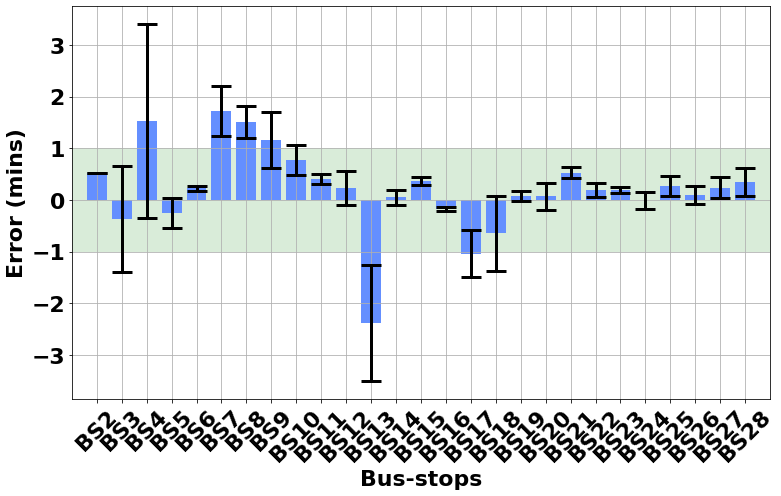

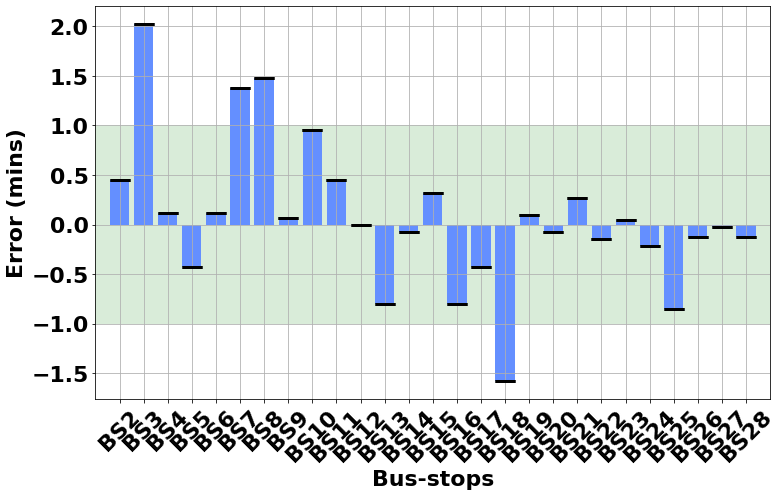

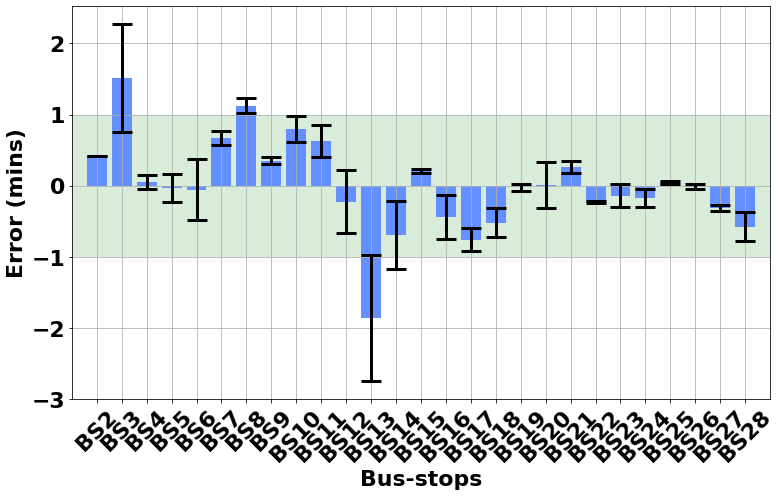

In [5]:
for trail_type in ['up','down']:
    for tz in ['Early_Morning','Morning','Afternoon','Evening']:
        plot_and_save(np.array(err_data[trail_type][tz]),f"{trail_type}_{tz}_new.png","bar")

# Up trail and Down trail immediate error

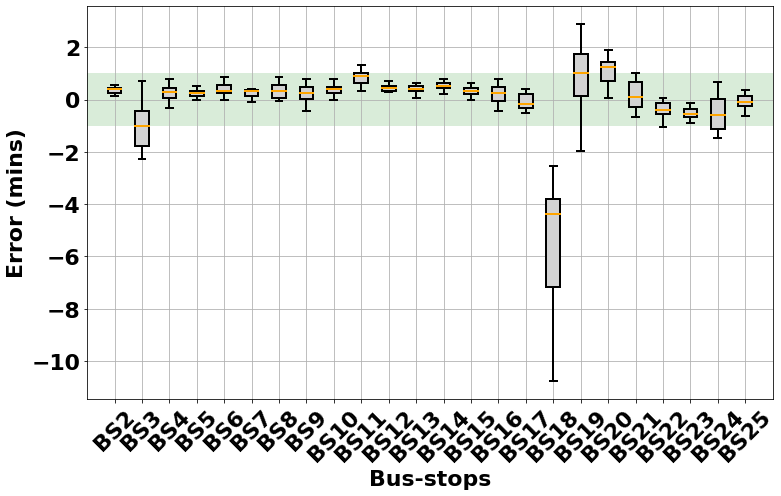

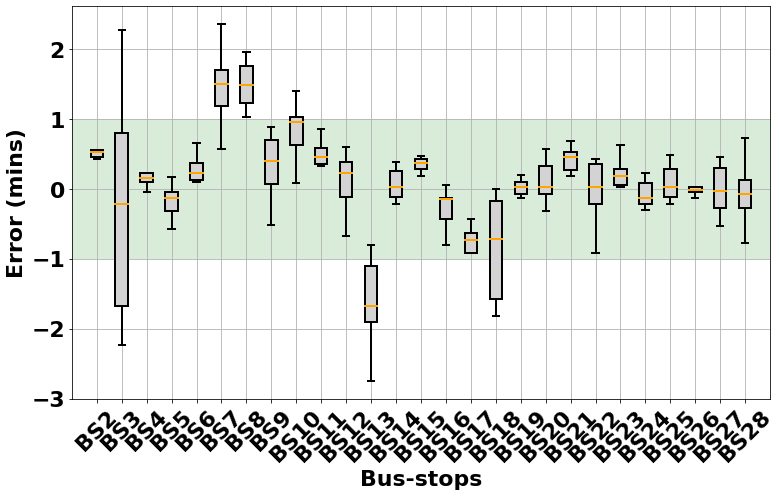

In [6]:
trail_types=["up","down"]

for trail_type in trail_types:
    whole_data=\
    np.vstack(
        (np.array(err_data[trail_type]["Early_Morning"]),
        np.array(err_data[trail_type]["Morning"]),
        np.array(err_data[trail_type]["Afternoon"]),
        np.array(err_data[trail_type]["Evening"])))

    plot_and_save(whole_data,f"{trail_type}_whole_data_new.png",plot_kind="box")

# Day wise Error Box-plot

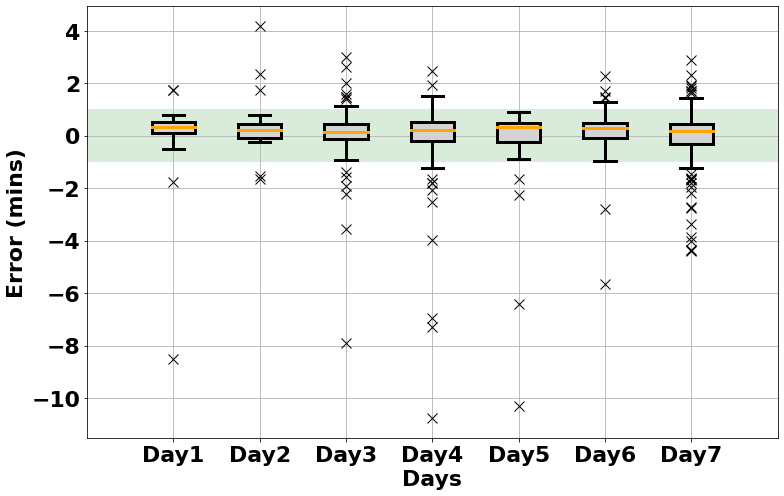

In [7]:
fig, ax = plt.subplots(figsize=(11,7))
pos=[1,2,3,4,5,6,7]
date_errs=list(date_wise_err.values())

bp1=\
ax.boxplot( date_errs,
            positions=pos,
            showfliers=True,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            flierprops=dict(marker='x', markerfacecolor='green', markersize=10,linestyle=''),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )
ax.fill_between(np.arange(0,9), -1, 1,facecolor='green',alpha=0.15)
ax.set_xlim(0,8)
#ax.set_ylim(-4,4)
ax.set_xlabel("Days",fontsize=22, fontweight='bold')
ax.set_ylabel("Error (mins)",fontsize=22, fontweight='bold')

ax.set_xticks(pos)
ax.set_xticklabels([f'Day{d}' for d in pos],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()
#plt.close()
fig.savefig("./report/plots/daywise_error_boxplot_new.png")

In [7]:
#NICE